## Name: Shivkumar G. Chauhan
### Roll No.: CS8A53
### Batch A-3
---
# Experiment - 1 : Explore the descriptive statistics on the dataset.

## imports

In [173]:
import pandas
import numpy
import statistics
import scipy.stats
import matplotlib.pyplot as pyplot
import warnings

## Configurations

In [174]:
# %matplotlib qt
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)

In [175]:
warnings.filterwarnings('ignore')

In [176]:
Data=pandas.read_csv("../Data/Raw_Data/owid-covid-data.csv")

In [177]:
Selected_Columns=['iso_code', 'continent', 'location', 'date', 'total_cases',
       'new_cases', 'total_deaths', 'new_deaths','population']

In [178]:
Data=Data[Selected_Columns]

In [179]:
Numerical_Columns=Data.describe().columns

In [180]:
Data=Data.sort_values(by="total_cases",ascending=False)

In [181]:
Data=Data[Data['location']=='India']

# Data Exploration

## Initial lookup

In [182]:
Data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population
119716,IND,Asia,India,2023-03-21,44696984.0,646.0,530808.0,2.0,1.417173e+09
119715,IND,Asia,India,2023-03-20,44696338.0,918.0,530806.0,4.0,1.417173e+09
119714,IND,Asia,India,2023-03-19,44695420.0,1071.0,530802.0,3.0,1.417173e+09
119713,IND,Asia,India,2023-03-18,44694349.0,843.0,530799.0,4.0,1.417173e+09
119712,IND,Asia,India,2023-03-17,44693506.0,796.0,530795.0,5.0,1.417173e+09


In [183]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1179 entries, 119716 to 119721
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso_code      1179 non-null   object 
 1   continent     1179 non-null   object 
 2   location      1179 non-null   object 
 3   date          1179 non-null   object 
 4   total_cases   1147 non-null   float64
 5   new_cases     1171 non-null   float64
 6   total_deaths  1104 non-null   float64
 7   new_deaths    1174 non-null   float64
 8   population    1179 non-null   float64
dtypes: float64(5), object(4)
memory usage: 92.1+ KB


In [184]:
Data.describe()

,total_cases,new_cases,total_deaths,new_deaths,population
count,1.147000e+03,1171.000000,1104.000000,1174.000000,1.179000e+03
mean,2.582627e+07,38170.570453,335841.667572,452.136286,1.417173e+09
std,1.755011e+07,71005.505886,202971.144119,806.654970,0.000000e+00
min,1.000000e+00,0.000000,1.000000,0.000000,1.417173e+09
25%,8.659964e+06,1769.500000,143271.000000,17.000000,1.417173e+09
50%,3.251237e+07,13052.000000,443712.500000,161.500000,1.417173e+09
75%,4.318767e+07,41258.500000,524843.750000,505.500000,1.417173e+09
max,4.469698e+07,414188.000000,530808.000000,6148.000000,1.417173e+09


In [185]:
Data.describe(include="all")

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population
count,1179,1179,1179,1179,1.147000e+03,1171.000000,1104.000000,1174.000000,1.179000e+03
unique,1,1,1,1179,NaN,NaN,NaN,NaN,NaN
top,IND,Asia,India,2023-03-21,NaN,NaN,NaN,NaN,NaN
freq,1179,1179,1179,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.582627e+07,38170.570453,335841.667572,452.136286,1.417173e+09
std,NaN,NaN,NaN,NaN,1.755011e+07,71005.505886,202971.144119,806.654970,0.000000e+00
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000,1.000000,0.000000,1.417173e+09
25%,NaN,NaN,NaN,NaN,8.659964e+06,1769.500000,143271.000000,17.000000,1.417173e+09
50%,NaN,NaN,NaN,NaN,3.251237e+07,13052.000000,443712.500000,161.500000,1.417173e+09
75%,NaN,NaN,NaN,NaN,4.318767e+07,41258.500000,524843.750000,505.500000,1.417173e+09


## Data Reduction

here some countries have NULL Values in their specific columns, so dropping the columns without filling it

In [186]:
Data.isnull().any()

iso_code        False
continent       False
location        False
date            False
total_cases      True
new_cases        True
total_deaths     True
new_deaths       True
population      False
dtype: bool

In [187]:
Data.isnull().sum()

iso_code         0
continent        0
location         0
date             0
total_cases     32
new_cases        8
total_deaths    75
new_deaths       5
population       0
dtype: int64

In [188]:
Data=Data.dropna()

In [189]:
Data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population
119716,IND,Asia,India,2023-03-21,44696984.0,646.0,530808.0,2.0,1.417173e+09
119715,IND,Asia,India,2023-03-20,44696338.0,918.0,530806.0,4.0,1.417173e+09
119714,IND,Asia,India,2023-03-19,44695420.0,1071.0,530802.0,3.0,1.417173e+09
119713,IND,Asia,India,2023-03-18,44694349.0,843.0,530799.0,4.0,1.417173e+09
119712,IND,Asia,India,2023-03-17,44693506.0,796.0,530795.0,5.0,1.417173e+09


In [190]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 119716 to 118613
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso_code      1103 non-null   object 
 1   continent     1103 non-null   object 
 2   location      1103 non-null   object 
 3   date          1103 non-null   object 
 4   total_cases   1103 non-null   float64
 5   new_cases     1103 non-null   float64
 6   total_deaths  1103 non-null   float64
 7   new_deaths    1103 non-null   float64
 8   population    1103 non-null   float64
dtypes: float64(5), object(4)
memory usage: 86.2+ KB


In [191]:
Data.describe()

,total_cases,new_cases,total_deaths,new_deaths,population
count,1.103000e+03,1103.000000,1103.000000,1103.000000,1.103000e+03
mean,2.681602e+07,40523.717135,335665.156845,481.239347,1.417173e+09
std,1.711653e+07,72508.261057,202978.427362,823.770238,0.000000e+00
min,8.100000e+01,3.000000,1.000000,0.000000,1.417173e+09
25%,9.870564e+06,2681.500000,143187.000000,27.000000,1.417173e+09
50%,3.331676e+07,14545.000000,443497.000000,202.000000,1.417173e+09
75%,4.327718e+07,43076.500000,524828.500000,526.000000,1.417173e+09
max,4.469698e+07,414188.000000,530808.000000,6148.000000,1.417173e+09


In [192]:
Data.describe(include="all")

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population
count,1103,1103,1103,1103,1.103000e+03,1103.000000,1103.000000,1103.000000,1.103000e+03
unique,1,1,1,1103,NaN,NaN,NaN,NaN,NaN
top,IND,Asia,India,2023-03-21,NaN,NaN,NaN,NaN,NaN
freq,1103,1103,1103,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.681602e+07,40523.717135,335665.156845,481.239347,1.417173e+09
std,NaN,NaN,NaN,NaN,1.711653e+07,72508.261057,202978.427362,823.770238,0.000000e+00
min,NaN,NaN,NaN,NaN,8.100000e+01,3.000000,1.000000,0.000000,1.417173e+09
25%,NaN,NaN,NaN,NaN,9.870564e+06,2681.500000,143187.000000,27.000000,1.417173e+09
50%,NaN,NaN,NaN,NaN,3.331676e+07,14545.000000,443497.000000,202.000000,1.417173e+09
75%,NaN,NaN,NaN,NaN,4.327718e+07,43076.500000,524828.500000,526.000000,1.417173e+09


# Descriptive statistics 

### Variance

In [193]:
Data.var()

total_cases     2.929756e+14
new_cases       5.257448e+09
total_deaths    4.120024e+10
new_deaths      6.785974e+05
population      0.000000e+00
dtype: float64

### Standard Deviation

In [194]:
Data.std()

total_cases     1.711653e+07
new_cases       7.250826e+04
total_deaths    2.029784e+05
new_deaths      8.237702e+02
population      0.000000e+00
dtype: float64

## Mean

## Median

In [124]:
Data.mean()

total_cases     2.681602e+07
new_cases       4.052372e+04
total_deaths    3.356652e+05
new_deaths      4.812393e+02
population      1.417173e+09
dtype: float64

In [125]:
Data.median()

total_cases     3.331676e+07
new_cases       1.454500e+04
total_deaths    4.434970e+05
new_deaths      2.020000e+02
population      1.417173e+09
dtype: float64

## Mode

In [126]:
Data.mode()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,IND,Asia,India,2020-03-13,81.0,114.0,530775.0,0.0,1.417173e+09
1,NaN,NaN,NaN,2020-03-14,84.0,185.0,NaN,NaN,NaN
2,NaN,NaN,NaN,2020-03-15,107.0,226.0,NaN,NaN,NaN
3,NaN,NaN,NaN,2020-03-16,114.0,796.0,NaN,NaN,NaN
4,NaN,NaN,NaN,2020-03-17,137.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1098,NaN,NaN,NaN,2023-03-17,44693506.0,NaN,NaN,NaN,NaN
1099,NaN,NaN,NaN,2023-03-18,44694349.0,NaN,NaN,NaN,NaN
1100,NaN,NaN,NaN,2023-03-19,44695420.0,NaN,NaN,NaN,NaN
1101,NaN,NaN,NaN,2023-03-20,44696338.0,NaN,NaN,NaN,NaN


## Quantile Ranges

In [127]:
Data.quantile(0.25)

total_cases     9.870564e+06
new_cases       2.681500e+03
total_deaths    1.431870e+05
new_deaths      2.700000e+01
population      1.417173e+09
Name: 0.25, dtype: float64

In [128]:
Data.quantile(0.75)

total_cases     4.327718e+07
new_cases       4.307650e+04
total_deaths    5.248285e+05
new_deaths      5.260000e+02
population      1.417173e+09
Name: 0.75, dtype: float64

In [129]:
Inter_quartile_range=Data.quantile(0.75)-Data.quantile(0.25)

In [130]:
Inter_quartile_range

total_cases     33406620.5
new_cases          40395.0
total_deaths      381641.5
new_deaths           499.0
population             0.0
dtype: float64

## Harmonic Mean

## Geometric Mean

In [131]:
[
    Numerical_Columns[i]+": "+str(statistics.harmonic_mean(Data[Numerical_Columns[i]])) for i in range(len(Numerical_Columns))
]

['total_cases: 12174.026545966093',
 'new_cases: 590.6947798460777',
 'total_deaths: 226.73649528812513',
 'new_deaths: 0',
 'population: 1417173120.0']

In [132]:
[
    Numerical_Columns[i]+": "+str(scipy.stats.mstats.gmean(Data[Numerical_Columns[i]]))  for i in range(len(Numerical_Columns))
]

['total_cases: 11453058.172569025',
 'new_cases: 9456.3447760703',
 'total_deaths: 164418.3863333646',
 'new_deaths: 0.0',
 'population: 1417173120.0000002']

## Skewness

## Kurtosis

In [133]:
Data.skew()

total_cases    -0.392029
new_cases       3.126835
total_deaths   -0.481730
new_deaths      3.180316
population      0.000000
dtype: float64

In [170]:
Data.kurtosis()

total_cases     -1.512429
new_cases        9.981665
total_deaths    -1.482979
new_deaths      10.880589
population       0.000000
dtype: float64

## Box Plots

<AxesSubplot: >

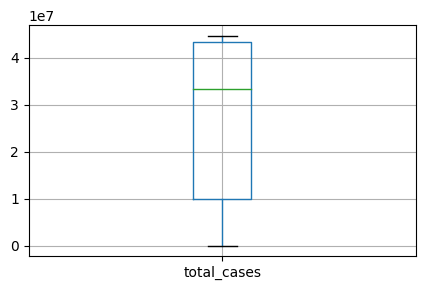

In [135]:
Data.boxplot("total_cases")

<AxesSubplot: >

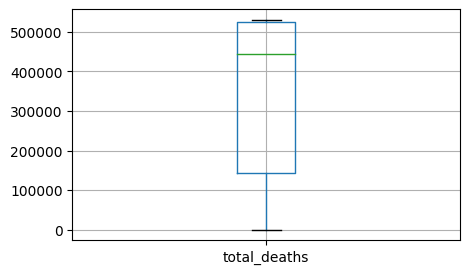

In [136]:
Data.boxplot("total_deaths")

<AxesSubplot: >

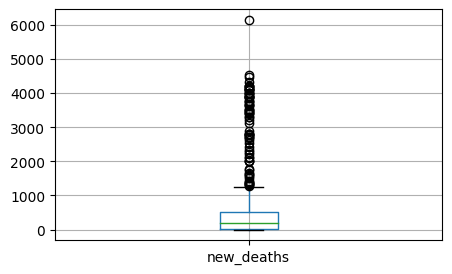

In [137]:
Data.boxplot("new_deaths")

<AxesSubplot: >

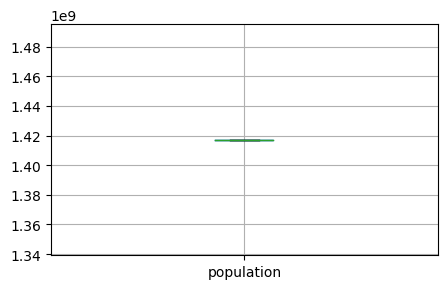

In [138]:
Data.boxplot("population")

<AxesSubplot: >

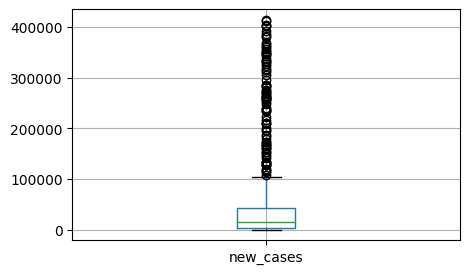

In [139]:
Data.boxplot('new_cases')

<AxesSubplot: >

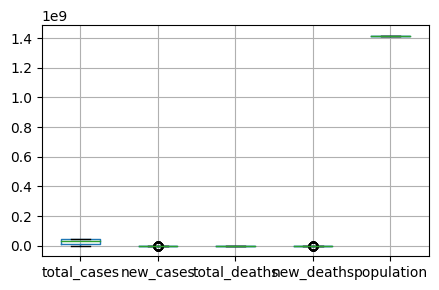

In [140]:
Data.boxplot()

## Correlation

In [168]:
Correlation_Data=Data.corr()
Correlation_Data.columns=["correlation_with_"+column for column in Numerical_Columns]

In [169]:
Correlation_Data

,correlation_with_total_cases,correlation_with_new_cases,correlation_with_total_deaths,correlation_with_new_deaths,correlation_with_population
total_cases,1.000000,-0.143211,0.995245,-0.187658,NaN
new_cases,-0.143211,1.000000,-0.155673,0.751701,NaN
total_deaths,0.995245,-0.155673,1.000000,-0.199681,NaN
new_deaths,-0.187658,0.751701,-0.199681,1.000000,NaN
population,NaN,NaN,NaN,NaN,NaN


## Covariance

In [143]:
Covarience_data=Data.cov()
Covarience_data.columns=["covarience_with_"+column for column in Numerical_Columns]

In [144]:
Covarience_data

,covarience_with_total_cases,covarience_with_new_cases,covarience_with_total_deaths,covarience_with_new_deaths,covarience_with_population
total_cases,2.929756e+14,-1.777378e+11,3.457765e+12,-2.645995e+09,0.0
new_cases,-1.777378e+11,5.257448e+09,-2.291135e+09,4.489918e+07,0.0
total_deaths,3.457765e+12,-2.291135e+09,4.120024e+10,-3.338816e+07,0.0
new_deaths,-2.645995e+09,4.489918e+07,-3.338816e+07,6.785974e+05,0.0
population,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0


## Bar Graph

## PieChart

<AxesSubplot: xlabel='location'>

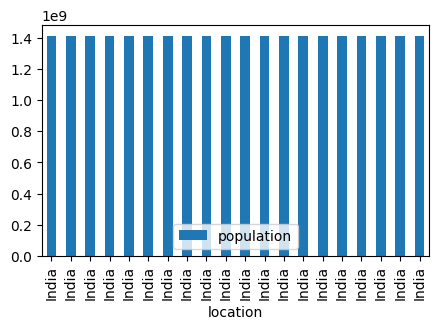

In [145]:
Data[:20].plot.bar(x='location',y=['population'])

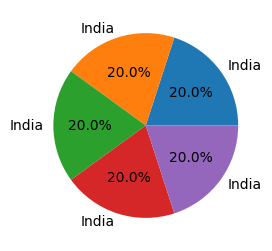

In [146]:
pyplot.pie(Data[:5]['total_cases'],labels=Data[:5]['location'],autopct='%1.1f%%')
pyplot.show()

## Line Graph

<AxesSubplot: xlabel='location'>

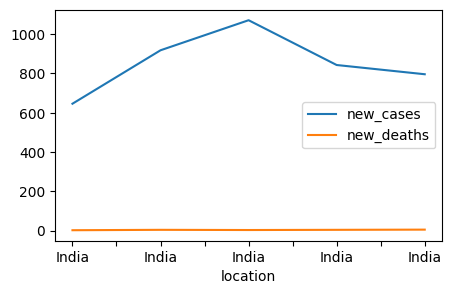

In [147]:
Data[:5].plot(kind="line",x='location',y=['new_cases','new_deaths'])

<AxesSubplot: xlabel='location'>

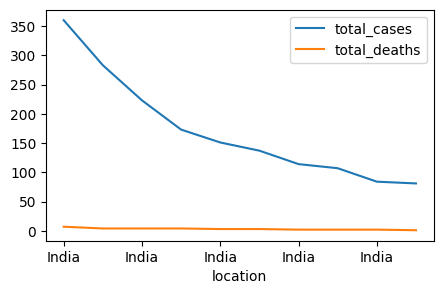

In [148]:
Data[-10:].plot(kind="line",x='location',y=['total_cases','total_deaths'])

# Gathering All Values Together

In [149]:
def GetStatsData(Data:pandas.DataFrame,Numerical_Columns)->pandas.DataFrame:
    Statastics_Data=pandas.DataFrame()
    Statastics_Data['median']=Data.median()
    Statastics_Data['mean']=Data.mean()
    Statastics_Data['skew']=Data.skew()
    Statastics_Data['kurtosis']=Data.kurtosis()
    Statastics_Data['first_quartile']=Data.quantile(0.25)
    Statastics_Data['third_quartile']=Data.quantile(0.75)
    Inter_quartile_range=Data.quantile(0.75)-Data.quantile(0.25)
    Statastics_Data['inter_quartile_range']=Inter_quartile_range
    Statastics_Data['min']=Data.min()[len(Numerical_Columns)-1:]
    Statastics_Data['max']=Data.max()[len(Numerical_Columns)-1:]
    Statastics_Data['harmonic_mean']=[
    statistics.harmonic_mean(Data[Numerical_Columns[i]]) for i in range(len(Numerical_Columns))
    ]

In [150]:
Statastics_Data=pandas.DataFrame()

In [151]:
Statastics_Data['mean']=Data.mean()

In [152]:
Statastics_Data['median']=Data.median()

In [153]:
Statastics_Data['skew']=Data.skew()

In [154]:
Statastics_Data['kurtosis']=Data.kurtosis()

In [155]:
Statastics_Data['first_quartile']=Data.quantile(0.25)

In [156]:
Statastics_Data['third_quartile']=Data.quantile(0.75)

In [157]:
Statastics_Data['inter_quartile_range']=Inter_quartile_range

In [158]:
Statastics_Data['max']=Data.max()[len(Numerical_Columns)-1:]

In [159]:
Statastics_Data['min']=Data.min()[len(Numerical_Columns)-1:]

In [160]:
Statastics_Data['harmonic_mean']=[
statistics.harmonic_mean(Data[Numerical_Columns[i]]) for i in range(len(Numerical_Columns))
]

In [161]:
Statastics_Data['geometric_mean']=[
scipy.stats.mstats.gmean(Data[Numerical_Columns[i]])  for i in range(len(Numerical_Columns))
]

In [162]:
Statastics_Data=pandas.concat([Statastics_Data,Correlation_Data,Covarience_data],axis=1)

In [163]:
Statastics_Data

,mean,median,skew,kurtosis,first_quartile,third_quartile,inter_quartile_range,max,min,harmonic_mean,...,correlation_with_total_cases,correlation_with_new_cases,correlation_with_total_deaths,correlation_with_new_deaths,correlation_with_population,covarience_with_total_cases,covarience_with_new_cases,covarience_with_total_deaths,covarience_with_new_deaths,covarience_with_population
total_cases,2.681602e+07,3.331676e+07,-0.392029,-1.512429,9.870564e+06,4.327718e+07,33406620.5,44696984.0,81.0,1.217403e+04,...,1.000000,-0.143211,0.995245,-0.187658,NaN,2.929756e+14,-1.777378e+11,3.457765e+12,-2.645995e+09,0.0
new_cases,4.052372e+04,1.454500e+04,3.126835,9.981665,2.681500e+03,4.307650e+04,40395.0,414188.0,3.0,5.906948e+02,...,-0.143211,1.000000,-0.155673,0.751701,NaN,-1.777378e+11,5.257448e+09,-2.291135e+09,4.489918e+07,0.0
total_deaths,3.356652e+05,4.434970e+05,-0.481730,-1.482979,1.431870e+05,5.248285e+05,381641.5,530808.0,1.0,2.267365e+02,...,0.995245,-0.155673,1.000000,-0.199681,NaN,3.457765e+12,-2.291135e+09,4.120024e+10,-3.338816e+07,0.0
new_deaths,4.812393e+02,2.020000e+02,3.180316,10.880589,2.700000e+01,5.260000e+02,499.0,6148.0,0.0,0.000000e+00,...,-0.187658,0.751701,-0.199681,1.000000,NaN,-2.645995e+09,4.489918e+07,-3.338816e+07,6.785974e+05,0.0
population,1.417173e+09,1.417173e+09,0.000000,0.000000,1.417173e+09,1.417173e+09,0.0,1417173120.0,1417173120.0,1.417173e+09,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0


In [164]:
Statastics_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, total_cases to population
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   mean                           5 non-null      float64
 1   median                         5 non-null      float64
 2   skew                           5 non-null      float64
 3   kurtosis                       5 non-null      float64
 4   first_quartile                 5 non-null      float64
 5   third_quartile                 5 non-null      float64
 6   inter_quartile_range           5 non-null      float64
 7   max                            5 non-null      object 
 8   min                            5 non-null      object 
 9   harmonic_mean                  5 non-null      float64
 10  geometric_mean                 5 non-null      float64
 11  correlation_with_total_cases   4 non-null      float64
 12  correlation_with_new_cases     4 non-nul

In [165]:
Statastics_Data.iloc[1,:]

mean                                    40523.717135
median                                       14545.0
skew                                        3.126835
kurtosis                                    9.981665
first_quartile                                2681.5
third_quartile                               43076.5
inter_quartile_range                         40395.0
max                                         414188.0
min                                              3.0
harmonic_mean                              590.69478
geometric_mean                           9456.344776
correlation_with_total_cases               -0.143211
correlation_with_new_cases                       1.0
correlation_with_total_deaths              -0.155673
correlation_with_new_deaths                 0.751701
correlation_with_population                      NaN
covarience_with_total_cases     -177737760299.296478
covarience_with_new_cases          5257447921.518825
covarience_with_total_deaths      -2291135182.

In [166]:
list(Statastics_Data)[:11]

['mean',
 'median',
 'skew',
 'kurtosis',
 'first_quartile',
 'third_quartile',
 'inter_quartile_range',
 'max',
 'min',
 'harmonic_mean',
 'geometric_mean']

<AxesSubplot: >

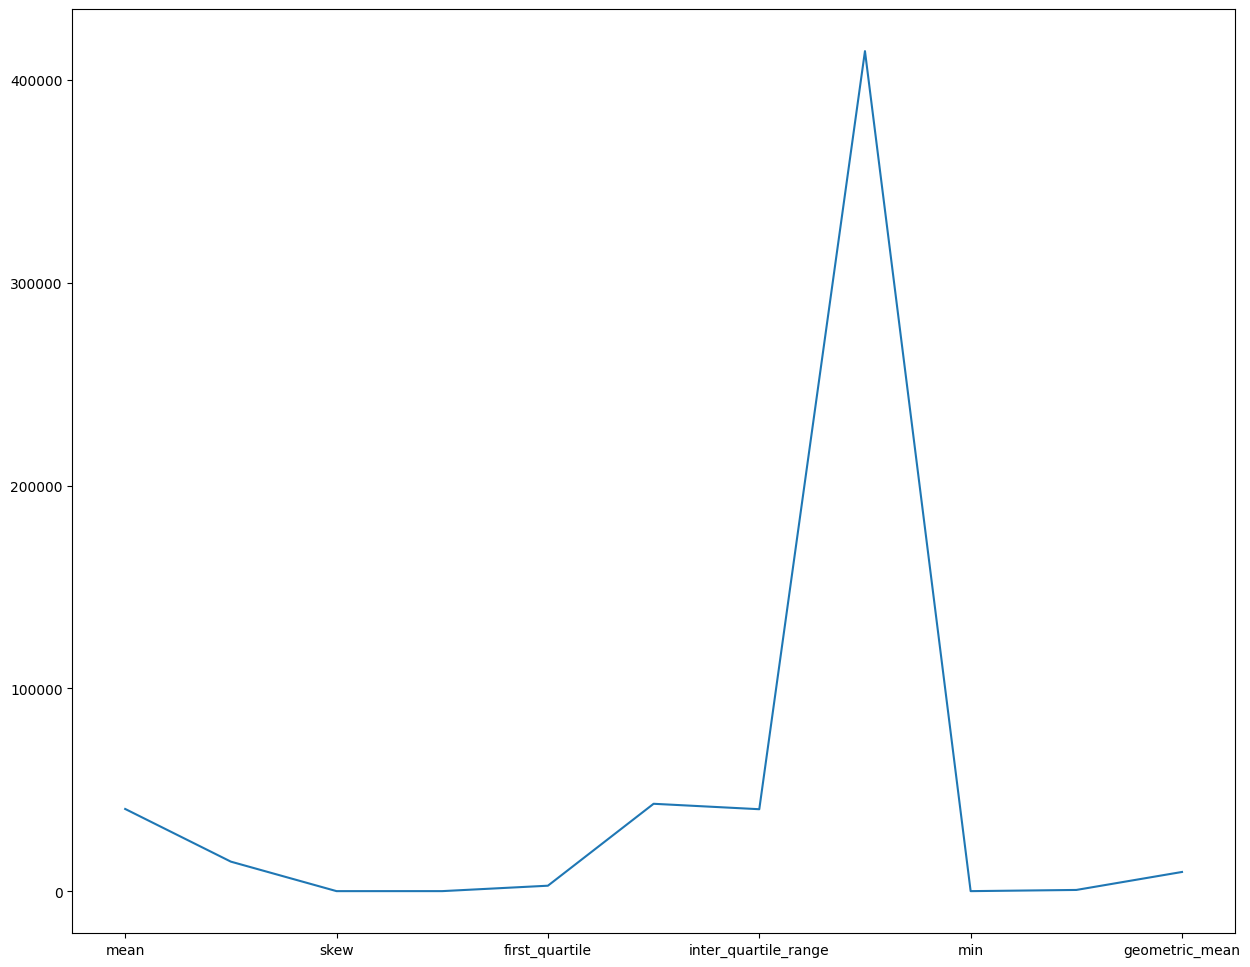

In [172]:
Statastics_Data.iloc[1,:11].plot()